In [1]:
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os
import cv2

In [2]:
img = cv2.imread("IMG_3666.jpg")
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgrgb_pixel = imgrgb.reshape((-1,3))

km = KMeans(n_clusters=5).fit(imgrgb_pixel)

centers = km.cluster_centers_


In [3]:
[",".join(map(str, val)) for val in sorted([list(map(int, i)) for i in centers], key=lambda x: (x[0], x[1], x[2]))]

['14,3,10', '108,55,89', '221,95,161', '233,100,188', '238,191,233']

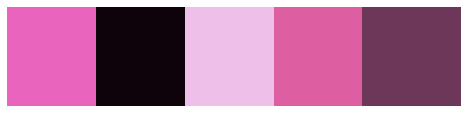

In [4]:
plt.figure(0, figsize=(10,2))
for idx, each_col in enumerate(centers):
    plt.subplot(1,8,idx+1)
    plt.axis(False)
    
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=-0.1, hspace=0)
plt.savefig("testplot.png", bbox_inches='tight', pad_inches = 0)
plt.show()

In [7]:
cropImg = cv2.imread("IMG_3666.jpg")
extractImg = cv2.imread("testplot.png")
extractImg = cv2.resize(extractImg, (cropImg.shape[1], 30))

addv = cv2.vconcat([cropImg, extractImg])

cv2.imshow('addv', addv)
cv2.waitKey(0)
cv2.destroyAllWindows()
